In [1]:
import tensorflow as tf
import keras
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


We can see that there are 60k images in the training set and 10k images in the testing set.

The dimension of our training vector is (60000, 28, 28), this is because there are 60,000 grayscale images with the dimension 28X28. That is 60000 matrixes of dimension 28*28 and each element is a number from (0,256) which represents a grey scale level

In [5]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

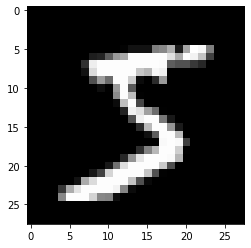

In [6]:
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
from tensorflow.keras import layers

In [8]:
x_train=x_train/255
x_test=x_test/255
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [9]:
print(x_train_flattened.shape)

(60000, 784)


In [10]:
model = keras.Sequential()
# adding a LSTM layer for the neural network with 64 hidden neurons directly connected to the input layer
model.add(keras.layers.LSTM(64, input_shape=(28,28),activation='relu'))
# adding a hidden layer with 100 neurons
model.add(keras.layers.Dense(100, activation="relu"))
# adding a output layer with 10 neurons
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5725 - accuracy: 0.8083
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1545 - accuracy: 0.9529
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1132 - accuracy: 0.9649
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0891 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0767 - accuracy: 0.9768


Achived an accuracy of 97.68% on training dataset

In [12]:
model.evaluate(x_test,y_test)
predicted_y=model.predict(x_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0715 - accuracy: 0.9779


Accuracy of 97.79% on the test dataset

In [13]:
y_predicted=[]
for i in range(0,len(predicted_y)) :
    y_predicted.append(np.argmax(predicted_y[i]))

In [14]:
import seaborn as sn

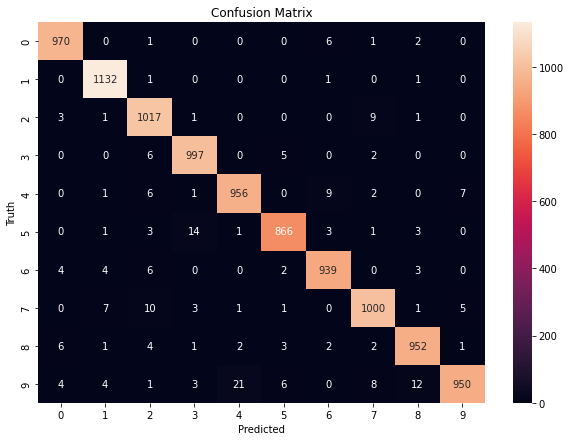

In [16]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()